<h1>Organisatorisches: Projekt mit schriftlicher Ausarbeitung</h1>

4. Gruppe:
Thema: Diamond Price Prediction
Vortragstag: 8.1.2025
Mitglieder: Nahid Qazi, Mohaddese Haydari, Azad Akin, Sean Müller, Denis Meyendrisch

### 1. Analyseziel:

- Prognose des Diamantenpreises basierend auf den verfügbaren Merkmalen.  
- Untersuchung der wichtigsten Einflussfaktoren (z.B. Karat, Schliff, Farbe, Reinheit) auf den Preis.  
- Modellierung und Evaluierung der Vorhersagegenauigkeit von mindestens zwei verschiedenen Machine-Learning-Modellen.  
- Visualisierung von Beziehungen und Verteilungen der Merkmale und ihrer Korrelation zum Preis.  

### 2. Kurze Beschreibung der Daten und der Datenqualität

Der vorliegende Datensatz enthält Informationen zu verschiedenen Eigenschaften von Diamanten, die für die Vorhersage ihres Preises verwendet werden. Jedes Datensatzobjekt beschreibt einen einzelnen Diamanten anhand der folgenden Merkmale:

- **Carat (Karat)**: Das Gewicht des Diamanten, ein wichtiger Faktor für den Preis.
- **Cut (Schliff)**: Die Qualität des Schliffs des Diamanten, unterteilt in verschiedene Kategorien wie "Ideal", "Premium", "Good", "Very Good" und "Fair".
- **Color (Farbe)**: Die Farbqualität des Diamanten, bewertet mit einer Skala von D (bestes Weiß) bis Z (farbiger Diamant).
- **Clarity (Reinheit)**: Die Reinheit des Diamanten, die die Anzahl und Sichtbarkeit von Einschlüsse und Unregelmäßigkeiten beschreibt, mit verschiedenen Kategorien wie "VVS1", "VS2", "SI1", "SI2", "I1".
- **Depth (Tiefe)**: Die Tiefe des Diamanten in Prozent.
- **Table (Tabelle)**: Der Anteil der oberen Fläche des Diamanten im Verhältnis zum Durchmesser.
- **Price (Preis)**: Der Marktpreis des Diamanten, der als Zielvariable für die Vorhersage dient.
- **x, y, z**: Die physikalischen Dimensionen des Diamanten (Länge, Breite, Höhe in Millimetern).

Die Daten sind von guter Qualität, da es **keine fehlenden Werte** gibt. Alle Werte sind vollständig und es gibt keine offensichtlichen Inkonsistenzen oder fehlerhaften Einträge. Allerdings sollten die numerischen Merkmale wie `carat`, `depth`, `table` und `price` einer weiteren Überprüfung auf Ausreißer unterzogen werden, um sicherzustellen, dass diese Werte in einem angemessenen Bereich liegen und keine Fehler vorliegen. Kategorische Variablen wie `cut`, `color` und `clarity` wurden bereits in einem standardisierten Format vorverarbeitet.

Insgesamt weist der Datensatz keine fehlenden oder ungültigen Daten auf, was eine gute Grundlage für die Durchführung von Modellierung und Vorhersagen bietet.

#### Import der erforderlichen Module und des Datensatzes

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Get the directory where the current notebook is located
notebook_dir = os.path.dirname(os.path.abspath("__file__"))

# Define the relative path to the dataset
dataset_path = os.path.join(notebook_dir, 'Datasets', 'Diamonds.csv')

# Load the dataset
df = pd.read_csv(dataset_path, sep=',', index_col=0)

# Display the first few rows of the dataset
df.head()

### 3. Data Cleaning


#### 3.1 Data Cleaning

In [3]:
df['cut'] = df['cut'].str.title()
df['color'] = df['color'].str.upper()
df['clarity'] = df['clarity'].str.upper()

In [ ]:
# Boxplot für Ausreißer
df.boxplot(column=['price'], figsize=(6, 4))
plt.title("Ausreißerprüfung für Preis")
plt.show()

df.boxplot(column=['carat'], figsize=(6, 4))
plt.title("Ausreißerprüfung für Carat")
plt.show()


In [5]:
# Kopie von der Originaldatei erstellen, bevor man was drauf speichert/ändert
df_cleaned = df.copy()


In [ ]:
# IQR-Methode zur Entfernung von Ausreißern
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Grenzen definieren
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Entferne Ausreißer
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Zeilenanzahl vor und nach der Bereinigung
print("Anzahl der Zeilen vor der Bereinigung:", len(df))
print("Anzahl der Zeilen nach der Bereinigung:", len(df_cleaned))


In [ ]:
df.boxplot(column=['price'], by='cut', figsize=(6, 4))
plt.title("Bereinigter Preis pro 'cut'")
plt.show()


In [8]:
# Definiere den Pfad zum Ordner "Datasets"
datasets_folder = os.path.join(os.getcwd(), "Datasets")

# Speichern des bereinigten Datensatzes im Ordner "Datasets"
df_cleaned.to_csv(os.path.join(datasets_folder, "diamonds_cleaned.csv"), index=False)



#### 3.2 Missing Value Imputation

In [ ]:
df.isnull().sum()


-> keine Imputation nötig

### 4. EDA


#### 4.1 Feature Verteilungen, Korrelationen, Visualisierungen


In [ ]:
# Kategorische Werte analysieren
CategorialFeatures = ["cut", "color", "clarity"]

# Häufigkeiten analysieren
for feature in CategorialFeatures:
    print(f"Häufigkeit für {feature}:")
    value_counts = df[feature].value_counts()

    # Formatierte Ausgabe
    styled_counts = value_counts.to_frame(name="Anzahl").style.highlight_max(axis=0, color="lightgreen").highlight_min(axis=0, color="lightcoral")
    display(styled_counts)  # Anzeige in Jupyter-Notebook

    # Kategorische Werte visuell darstellen mit Barplots
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, palette="coolwarm")
    plt.title(f"Häufigkeit der Kategorien in '{feature}'")
    plt.show()


In [ ]:
# Häufigkeiten für kategorische Werte
CategorialFeatures = ["cut", "color", "clarity"]
for feature in CategorialFeatures:
    print(f"Häufigkeit für {feature}:")
    value_counts = df[feature].value_counts()

    # Formatierte Ausgabe
    styled_counts = value_counts.to_frame(name="Anzahl").style.highlight_max(axis=0, color="lightgreen").highlight_min(axis=0, color="lightcoral")
    display(styled_counts)  # Anzeige in Jupyter-Notebook

    # Balkendiagramme für kategorische Werte
    df[feature].value_counts().plot(kind='bar', figsize=(5, 3), title=f"Häufigkeit von '{feature}'", color='skyblue', edgecolor='black')
    plt.xlabel(feature.capitalize())
    plt.ylabel("Anzahl")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()



In [ ]:
# Liste der numerischen Features
QuantitativeFeatures = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Histogramm -> hier ist Rice-Regel von Vorteil für jedes numerische Feature
for feature in QuantitativeFeatures:
    df[feature].hist(bins="rice", figsize=(5, 3))
    plt.title(f"Verteilung von '{feature}' (Rice-Regel)")
    plt.xlabel(feature)
    plt.ylabel("Anzahl")
    plt.show()


In [ ]:
# Statistische Zusammenfassung für numerische Features
QuantitativeFeatures = ["carat", "depth", "table", "price", "x", "y", "z"]
summary_stats = df[QuantitativeFeatures].describe()

# Stilvolle Ausgabe
styled_summary = summary_stats.style.format(precision=2).highlight_max(axis=0, color="lightgreen").highlight_min(axis=0, color="lightcoral")
display(styled_summary)


In [ ]:
# Kategorische Features miteinander vergleichen
# Kreuztabellen für Kategorische Features
crosstab_cut_color = pd.crosstab(df['cut'], df['color'])
crosstab_cut_clarity = pd.crosstab(df['cut'], df['clarity'])
crosstab_color_clarity = pd.crosstab(df['color'], df['clarity'])

print("Kreuztabelle zwischen 'cut' und 'color':\n", crosstab_cut_color)
print("\nKreuztabelle zwischen 'cut' und 'clarity':\n", crosstab_cut_clarity)
print("\nKreuztabelle zwischen 'color' und 'clarity':\n", crosstab_color_clarity)


In [ ]:
# Gestapeltes Balkendiagramm für Cut und Color
crosstab_cut_color.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Korrelation zwischen 'cut' und 'color'")
plt.xlabel("Cut")
plt.ylabel("Anzahl")
plt.legend(title="Color")
plt.show()

# Gestapeltes Balkendiagramm für Cut und Clarity
crosstab_cut_clarity.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Korrelation zwischen 'cut' und 'clarity'")
plt.xlabel("Cut")
plt.ylabel("Anzahl")
plt.legend(title="Clarity")
plt.show()

# Gestapeltes Balkendiagramm für Color und Clarity
crosstab_color_clarity.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Korrelation zwischen 'color' und 'clarity'")
plt.xlabel("Color")
plt.ylabel("Anzahl")
plt.legend(title="Clarity")
plt.show()


In [16]:
# Definiere den Pfad zum Ordner "Datasets"
datasets_folder = os.path.join(os.getcwd(), "Datasets")

crosstab_cut_color.to_csv(os.path.join(datasets_folder, "cut_vs_color.csv"))
crosstab_cut_clarity.to_csv(os.path.join(datasets_folder, "cut_vs_clarity.csv"))
crosstab_color_clarity.to_csv(os.path.join(datasets_folder, "color_vs_clarity.csv"))

In [ ]:
# Quantitative Werte mit Quantitativen Werten vergleichen (Scatterplots)
QuantitativeFeatures = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

for i, feature_x in enumerate(QuantitativeFeatures):
    for j, feature_y in enumerate(QuantitativeFeatures):
        if i < j:  # Vermeidung von doppelten Kombinationen
            df.plot.scatter(x=feature_x, y=feature_y, figsize=(6, 4))
            plt.title(f"{feature_x} vs. {feature_y}")
            plt.show()


In [ ]:
# Korrelationstabelle für numerische Features -> Wie hängen numerische Features miteinander zusammen
# Werte zwischen -1 und +1: 
# +1: Starke positive Korrelation (beide Werte steigen gemeinsam).
# -1: Starke negative Korrelation (ein Wert steigt, der andere sinkt).
# 0: Keine lineare Korrelation.
# Korrelationstabelle für numerische Features
QuantitativeFeatures = df.select_dtypes(include=['float64', 'int64'])

# Korrelationstabelle berechnen
correlation_matrix = QuantitativeFeatures.corr(method='pearson')
print("Korrelationstabelle:\n", correlation_matrix)


In [ ]:
# Scatter-Matrix für alle quantitativen Features
QuantitativeFeatures = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

scatter_matrix(df[QuantitativeFeatures], figsize=(8, 8), diagonal='hist')
plt.show()


In [ ]:
# Zusammenfassung der Preisdaten pro `cut`
print(df.groupby('cut')['price'].describe())

# Zusammenfassung der Preisdaten pro `color`
print(df.groupby('color')['price'].describe())

# Zusammenfassung der Preisdaten pro `clarity`
print(df.groupby('clarity')['price'].describe())


In [ ]:
# Boxplot für Preis pro `cut`
df.boxplot(column=['price'], by='cut', figsize=(6, 4))
plt.title("Preisverteilung pro 'cut'")
plt.suptitle("")  # Entfernt den Standardtitel
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

# Boxplot für Preis pro `color`
df.boxplot(column=['price'], by='color', figsize=(6, 4))
plt.title("Preisverteilung pro 'color'")
plt.suptitle("")
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()

# Boxplot für Preis pro `clarity`
df.boxplot(column=['price'], by='clarity', figsize=(6, 4))
plt.title("Preisverteilung pro 'clarity'")
plt.suptitle("")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()


In [ ]:

# Boxplot für `carat` vs. `cut`
plt.figure(figsize=(6, 4))
df.boxplot(column=['carat'], by='cut')
plt.title("Karatverteilung pro 'cut'")
plt.suptitle("")
plt.xlabel("Cut")
plt.ylabel("Carat")
plt.show()

# Boxplot für `carat` vs. `color`
plt.figure(figsize=(6, 4))
df.boxplot(column=['carat'], by='color')
plt.title("Karatverteilung pro 'color'")
plt.suptitle("")
plt.xlabel("Color")
plt.ylabel("Carat")
plt.show()

# Boxplot für `carat` vs. `clarity`
plt.figure(figsize=(6, 4))
df.boxplot(column=['carat'], by='clarity')
plt.title("Karatverteilung pro 'clarity'")
plt.suptitle("")
plt.xlabel("Clarity")
plt.ylabel("Carat")
plt.show()


In [ ]:

# Barplot für `cut`
sns.countplot(data=df, x='cut')
plt.title("Häufigkeit der Kategorien in 'cut'")
plt.show()

# Boxplot für Preis pro `cut`
sns.boxplot(data=df, x='cut', y='price')
plt.title("Preisverteilung pro 'cut'")
plt.show()

### 5. Feature Engeneering

In [ ]:
print(df["cut"].unique())
print(df['clarity'].unique())
print(df['color'].unique())

In [ ]:
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

encoder = OrdinalEncoder(categories=[cut_categories, clarity_categories, color_categories])

ordinal_encoded = encoder.fit_transform(df[['cut', 'clarity', 'color']])


ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns = encoder.get_feature_names_out(['cut','clarity', 'color']))
print(ordinal_encoded_df.head())


df_ordinal_encoded = pd.concat([df.drop(['cut', 'clarity', 'color'], axis=1), ordinal_encoded_df], axis=1)
df = df_ordinal_encoded
df.head(12)


In [ ]:
df['price_per_carat'] = df['price'] / df['carat']
df['volume'] = df['x'] * df['y'] * df['z']
df['form_factor'] = df['x'] / df['y']
df['price_to_volume'] = df['price'] / df['volume']
df['mean_dimension'] = (df['x'] + df['y'] + df['z']) / 3
df['table_to_depth_ratio'] = df['table'] / df['depth']
df.head()


In [ ]:

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

corr_with_target = correlation_matrix['price'].abs()
threshold = 0.1
selected_features = corr_with_target[corr_with_target > threshold].index.tolist()

df_selected = df[selected_features]
df_selected.head()


In [ ]:
df_selected = df_selected.drop(columns=['Unnamed: 0'], errors='ignore') #unnamed wird entfernt
df= df_selected
df.head()

In [29]:

y= df['price']                                                                                              #daten wurden in features x und zielwert y sowie in Trainings- und Testsets aufgeteilt 
X= df.drop(columns=['price'])

X_train, X_test, y_test, y_train = train_test_split(X,y, test_size=0.2, random_state=42)


In [ ]:

# Überprüfe die Daten auf fehlende Werte
print("Anzahl fehlender Werte in den Features:")
print(df.isnull().sum())

# Entferne Zeilen mit fehlenden Werten
df = df.dropna()

# Überprüfe die Daten auf nicht-numerische Werte
print("Datentypen der Features:")
print(df.dtypes)

# Initialisiere den StandardScaler
scaler = StandardScaler()




In [ ]:

# Ersetze unendliche Werte durch NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Überprüfe auf unendliche Werte
print("Anzahl unendlicher Werte in den Features:")
print(df.isin([np.inf, -np.inf]).sum())

# Entferne Zeilen mit NaN-Werten
df.dropna(inplace=True)

# Überprüfe die Daten auf nicht-numerische Werte
print("Datentypen der Features:")
print(df.dtypes)

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Auswahl der Features und Zielwert
X = df.drop('price', axis=1)
y = df['price']

# Fitte und transformiere die Daten
X_scaled = scaler.fit_transform(X)

# Neuer DataFrame mit den skalierten Daten
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

# Zeige die ersten Zeilen des neuen DataFrames
print("Erste Zeilen des skalierten DataFrames:")
print(df_scaled.head())


In [ ]:

# Ersetze unendliche Werte durch NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Überprüfe auf unendliche Werte
print("Anzahl unendlicher Werte in den Features:")
print(df.isin([np.inf, -np.inf]).sum())

# Entferne Zeilen mit NaN-Werten
df.dropna(inplace=True)

# Überprüfe auf extreme Werte
print("Maximale Werte in den Features:")
print(df.max())

print("Minimale Werte in den Features:")
print(df.min())

# Korrigiere extreme Werte
extreme_cols = ['price_to_volume', 'table_to_depth_ratio']
for col in extreme_cols:
    median = df[col].median()
    df[col] = np.where(np.abs(df[col]) > 1e10, median, df[col])

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Auswahl der Features und Zielwert
X = df.drop('price', axis=1)
y = df['price']

# Fitte und transformiere die Daten
X_scaled = scaler.fit_transform(X)

# Neuer DataFrame mit den skalierten Daten
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

# Zeige die ersten Zeilen des neuen DataFrames
print("Erste Zeilen des skalierten DataFrames:")
print(df_scaled.head())


In [ ]:

# Ersetze unendliche Werte durch NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Überprüfe auf unendliche Werte
print("Anzahl unendlicher Werte in den Features:")
print(df.isin([np.inf, -np.inf]).sum())

# Entferne Zeilen mit NaN-Werten
df.dropna(inplace=True)

# Überprüfe auf extreme Werte
print("Maximale Werte in den Features:")
print(df.max())

print("Minimale Werte in den Features:")
print(df.min())

# Korrigiere extreme Werte
extreme_cols = ['price_to_volume', 'table_to_depth_ratio']
for col in extreme_cols:
    max_value = df[col].max()
    min_value = df[col].min()
    print(f"Max value for {col}: {max_value}")
    print(f"Min value for {col}: {min_value}")
    df[col] = np.where(df[col] > 1e4, 1e4, df[col])  # Clipping extreme high values
    df[col] = np.where(df[col] < -1e4, -1e4, df[col])  # Clipping extreme low values

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Auswahl der Features und Zielwert
X = df.drop('price', axis=1)
y = df['price']

# Fitte und transformiere die Daten
X_scaled = scaler.fit_transform(X)

# Neuer DataFrame mit den skalierten Daten
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

# Zeige die ersten Zeilen des neuen DataFrames
print("Erste Zeilen des skalierten DataFrames:")
print(df_scaled.head())


In [ ]:
# Daten skalieren mit Standardization

scaler = StandardScaler()

X = df.drop('price', axis=1)
y = df['price']

X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

print("Erste Zeilen des skalierten DataFrames:")
df_scaled.head()

In [ ]:
# Daten Skalieren mit Minmax scaling 

scaler = MinMaxScaler()

X = df.drop('price', axis=1)
y = df['price']

X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

print("Erste Zeilen des skalierten DataFrames:")
df_scaled.head()


### 6. ML-Modellierung

#### 6.1 Linear Regression

Mean Squared Error (MSE): 527672.0105021218
R-squared (R²): 0.9670901543650576

Model Coefficients:
                      Coefficient
carat                 8508.535383
table                   -2.481905
x                     -430.946988
y                     -758.936216
z                    -1868.020230
clarity                -38.931337
color                  -19.201487
price_per_carat          1.456366
volume                  18.010494
price_to_volume        -50.257859
mean_dimension       -1019.301145
table_to_depth_ratio  -311.877648


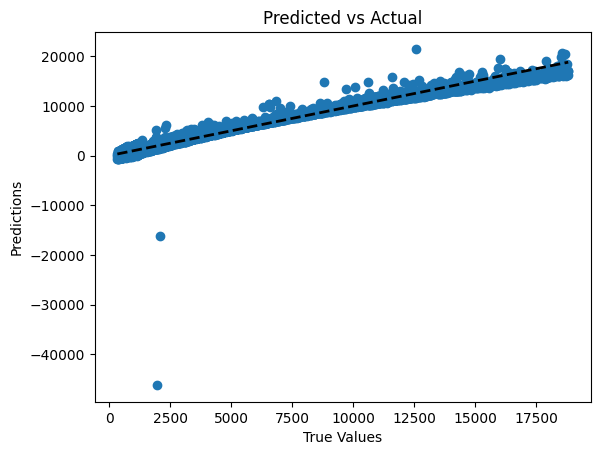

In [87]:

# Step 2: Create and train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Output the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Optional: Display the model coefficients to understand feature importance
print("\nModel Coefficients:")
coeff_df = pd.DataFrame(linear_regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs Actual')
plt.show()

MSE: 483677.8527316516
R²: 0.9698339818037874


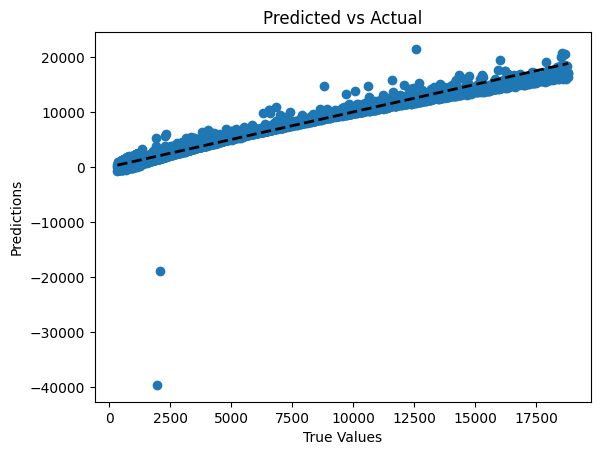

In [88]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=1.0)  # Hyperparameter alpha ausprobieren
model_ridge.fit(X_train, y_train)

# Vorhersagen
y_pred = model_ridge.predict(X_test)

# Evaluierung
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R²: {r2_score(y_test, y_pred)}')

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs Actual')
plt.show()

#### 6.2 Regression Tree

Mean Squared Error: 20087.952522255193
Mean Absolute Error: 33.99721810089021
R^2 Score: 0.9987471546652619
Feature Importances:
carat: 0.0041
table: 0.0000
x: 0.0002
y: 0.1120
z: 0.0004
clarity: 0.0000
color: 0.0000
price_per_carat: 0.0379
volume: 0.1426
price_to_volume: 0.6831
mean_dimension: 0.0196
table_to_depth_ratio: 0.0000


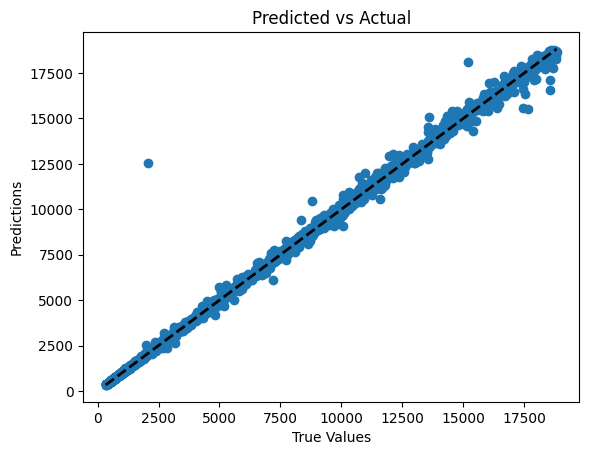

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Initialize and train the Regression Tree model
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

# Feature importance
print("Feature Importances:")
for feature, importance in zip(X.columns, regressor.feature_importances_):
    print(f"{feature}: {importance:.4f}")

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs Actual')
plt.show()

Mean Squared Error: 301910.67899105843


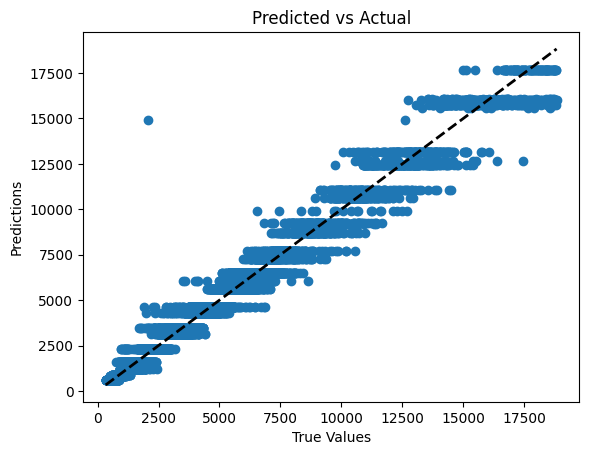

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialisierung des Regression Tree Modells
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=4)

# Modell trainieren
reg_tree.fit(X_train, y_train)

# Vorhersage auf Testdaten
y_pred = reg_tree.predict(X_test)

# Modellbewertung (z. B. mit MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs Actual')
plt.show()

#### 6.3 Random Forests

Mean Squared Error: 8852.292143239982
Mean Absolute Error: 15.850774295252226
R^2 Score: 0.9994479002824648
Feature Importances:
carat: 0.0084
table: 0.0000
x: 0.0173
y: 0.0446
z: 0.0003
clarity: 0.0000
color: 0.0000
price_per_carat: 0.0385
volume: 0.1274
price_to_volume: 0.6823
mean_dimension: 0.0811
table_to_depth_ratio: 0.0000


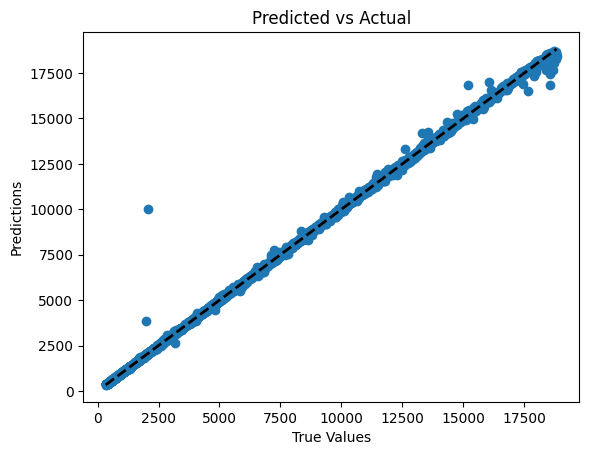

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Initialize and train the Random Forest model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

# Feature importance
print("Feature Importances:")
for feature, importance in zip(X.columns, regressor.feature_importances_):
    print(f"{feature}: {importance:.4f}")

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs Actual')
plt.show()

MSE: 10655.014869778777
R²: 0.9993354680793686


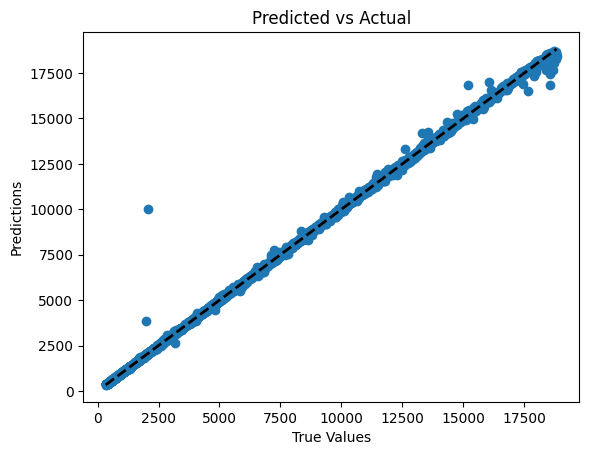

In [92]:
from sklearn.ensemble import RandomForestRegressor

# Modell
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)

# Vorhersagen
y_pred_rf = model_rf.predict(X_test)

# Evaluierung
print(f'MSE: {mean_squared_error(y_test, y_pred_rf)}')
print(f'R²: {r2_score(y_test, y_pred_rf)}')

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs Actual')
plt.show()


#### 6.4 k-Nearest Neighbors

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Initialize and train the k-Nearest Neighbors model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)


Mean Squared Error: 67978.35446216617
Mean Absolute Error: 73.68191765578635
R^2 Score: 0.9957603262872737


MSE: 67978.35446216617
R²: 0.9957603262872737


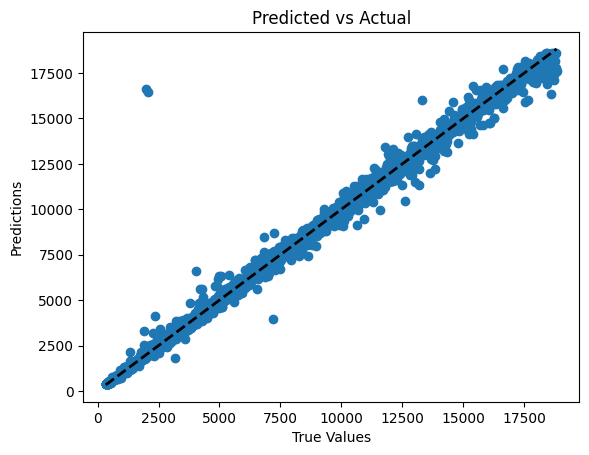

In [95]:
from sklearn.neighbors import KNeighborsRegressor

# Modell
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Vorhersagen
y_pred_knn = model_knn.predict(X_test)

# Evaluierung
print(f'MSE: {mean_squared_error(y_test, y_pred_knn)}')
print(f'R²: {r2_score(y_test, y_pred_knn)}')

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs Actual')
plt.show()



#### 6.5 Support Vector Machine

Mean Squared Error: 117287.30812808053
Mean Absolute Error: 61.17400158164909
R^2 Score: 0.9926850256814644


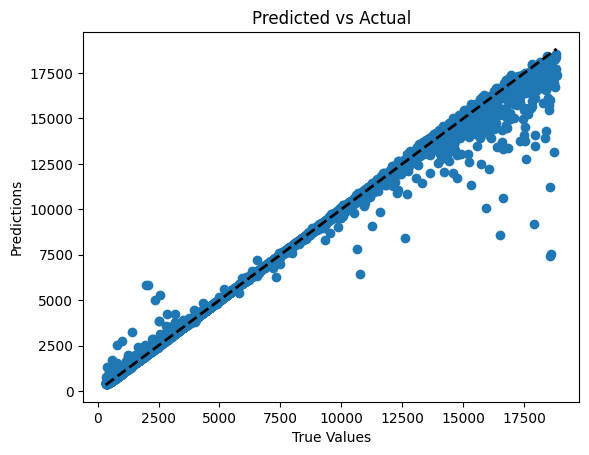

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler



# Initialize and train the Support Vector Machine model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs Actual')
plt.show()



In [ ]:
from sklearn.svm import SVR

# Modell
model_svr = SVR(C=1.0, kernel='rbf', gamma='scale')
model_svr.fit(X_train, y_train)

# Vorhersagen
y_pred_svr = model_svr.predict(X_test)

# Evaluierung
print(f'MSE: {mean_squared_error(y_test, y_pred_svr)}')
print(f'R²: {r2_score(y_test, y_pred_svr)}')
